In [1]:

# !pip install yfinance
import sys
import  numpy as np
import pandas as pd

import yfinance
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.mosaicplot import mosaic


def is_venv():
    return (hasattr(sys, 'real_prefix') or
            (hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix))
    
if is_venv():
    print('inside virtualenv or venv')
else:
    print('outside virtualenv or venv')





inside virtualenv or venv


In [2]:
#https://github.com/datasets/nasdaq-listings/blob/master/data/nasdaq-listed.csv

df_nasdaq = pd.read_csv("nasdaq-listed.csv")
df_nasdaq.head()

,Symbol,Company Name,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size,ETF,NextShares
0,AABA,Altaba Inc.,Altaba Inc. - Common Stock,Q,N,N,100.0,N,N
1,AAL,"American Airlines Group, Inc.","American Airlines Group, Inc. - Common Stock",Q,N,N,100.0,N,N
2,AAME,Atlantic American Corporation,Atlantic American Corporation - Common Stock,G,N,N,100.0,N,N
3,AAOI,"Applied Optoelectronics, Inc.","Applied Optoelectronics, Inc. - Common Stock",G,N,N,100.0,N,N
4,AAON,"AAON, Inc.","AAON, Inc. - Common Stock",Q,N,N,100.0,N,N


Market Category Codes - 

#Q = NASDAQ Global Select MarketSM
#G = NASDAQ Global MarketSM
#S = NASDAQ Capital Market


Financial Status Codes - 

#D = Deficient: Issuer Failed to Meet NASDAQ Continued Listing Requirements
#E = Delinquent: Issuer Missed Regulatory Filing Deadline
#Q = Bankrupt: Issuer Has Filed for Bankruptcy
#N = Normal (Default): Issuer Is NOT Deficient, Delinquent, or Bankrupt.
#G = Deficient and Bankrupt
#H = Deficient and Delinquent
#J = Delinquent and Bankrupt
#K = Deficient, Delinquent, and Bankrupt



In [3]:
len(df_nasdaq)

3370

In [4]:


df_nasdaq['Market Category'] = df_nasdaq['Market Category'].replace("Q","NASDAQ Global Select MarketSM")
df_nasdaq['Market Category'] = df_nasdaq['Market Category'].replace("G","NASDAQ Global MarketSM")
df_nasdaq['Market Category'] = df_nasdaq['Market Category'].replace("S","NASDAQ Capital Market")
df_nasdaq['Market Category'].value_counts()




Market Category
NASDAQ Global Select MarketSM    1529
NASDAQ Capital Market             969
NASDAQ Global MarketSM            872
Name: count, dtype: int64

In [5]:
df_nasdaq.head()


,Symbol,Company Name,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size,ETF,NextShares
0,AABA,Altaba Inc.,Altaba Inc. - Common Stock,NASDAQ Global Select MarketSM,N,N,100.0,N,N
1,AAL,"American Airlines Group, Inc.","American Airlines Group, Inc. - Common Stock",NASDAQ Global Select MarketSM,N,N,100.0,N,N
2,AAME,Atlantic American Corporation,Atlantic American Corporation - Common Stock,NASDAQ Global MarketSM,N,N,100.0,N,N
3,AAOI,"Applied Optoelectronics, Inc.","Applied Optoelectronics, Inc. - Common Stock",NASDAQ Global MarketSM,N,N,100.0,N,N
4,AAON,"AAON, Inc.","AAON, Inc. - Common Stock",NASDAQ Global Select MarketSM,N,N,100.0,N,N


In [6]:
df_nasdaq.columns

Index(['Symbol', 'Company Name', 'Security Name', 'Market Category',
       'Test Issue', 'Financial Status', 'Round Lot Size', 'ETF',
       'NextShares'],
      dtype='object')

# Different Data - Nasdaq Official

In [90]:

df_nasdaq_official = pd.read_csv("nasdaq_official.csv")
df_nasdaq_official.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$137.96,4.2200,3.155%,4.036534e+10,United States,1999.0,2950195,Industrials,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$29.90,3.9100,15.044%,5.336310e+09,United States,2016.0,16582832,Industrials,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$0.85,-0.0400,-4.494%,2.687884e+07,China,2008.0,20722,Real Estate,Other Consumer Services
3,AACI,Armada Acquisition Corp. I Common Stock,$10.74,-0.0300,-0.279%,0.000000e+00,United States,2021.0,2055,Finance,Blank Checks
4,AACIW,Armada Acquisition Corp. I Warrant,$0.0161,-0.0049,-23.333%,0.000000e+00,United States,2021.0,15800,Finance,Blank Checks


In [101]:
df_nasdaq_official[df_nasdaq_official.Symbol == 'AERT']

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
161,AERT,Aeries Technology Inc. Class A Ordinary Share,$2.43,-0.11,-4.331%,37076131.0,United States,2021.0,63864,Basic Materials,Forest Products


In [18]:
len(df_nasdaq_official)

7378

In [19]:
df_nasdaq_official.columns


Index(['Symbol', 'Name', 'Last Sale', 'Net Change', '% Change', 'Market Cap',
       'Country', 'IPO Year', 'Volume', 'Sector', 'Industry'],
      dtype='object')

Text(0.5, 1.0, 'Number of Listed Companies - Divided by Sector')

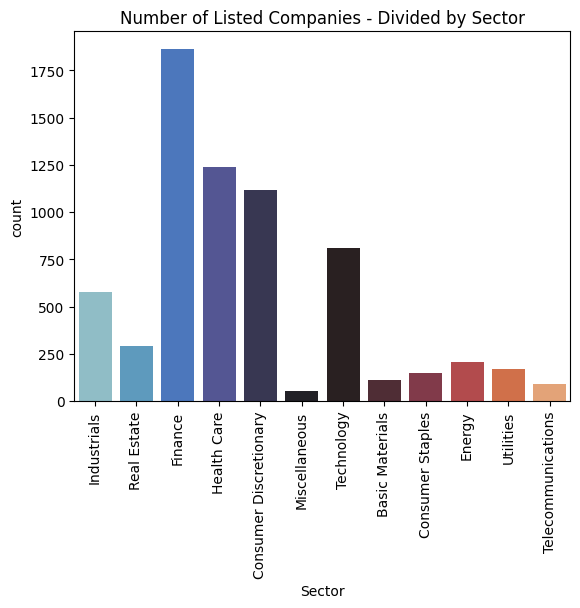

In [62]:
countplot_sector = sns.countplot(data = df_nasdaq_official, x='Sector', palette = 'icefire')
countplot_sector.tick_params(axis='x', rotation=90)
countplot_sector.set_title("Number of Listed Companies - Divided by Sector")

Text(0.5, 1.0, 'Number of Listed Companies - Divided by Country')

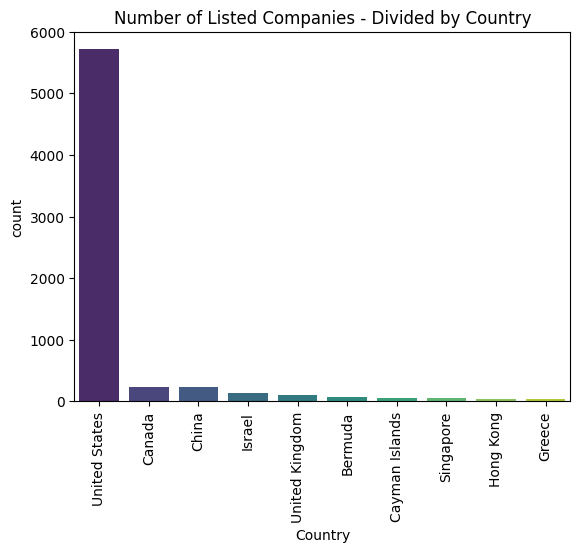

In [63]:
countplot_country = sns.countplot(data = df_nasdaq_official, x='Country', palette = 'viridis', order=pd.value_counts(df_nasdaq_official['Country']).iloc[:10].index)
countplot_country.tick_params(axis='x', rotation=90)
countplot_country.set_title("Number of Listed Companies - Divided by Country")

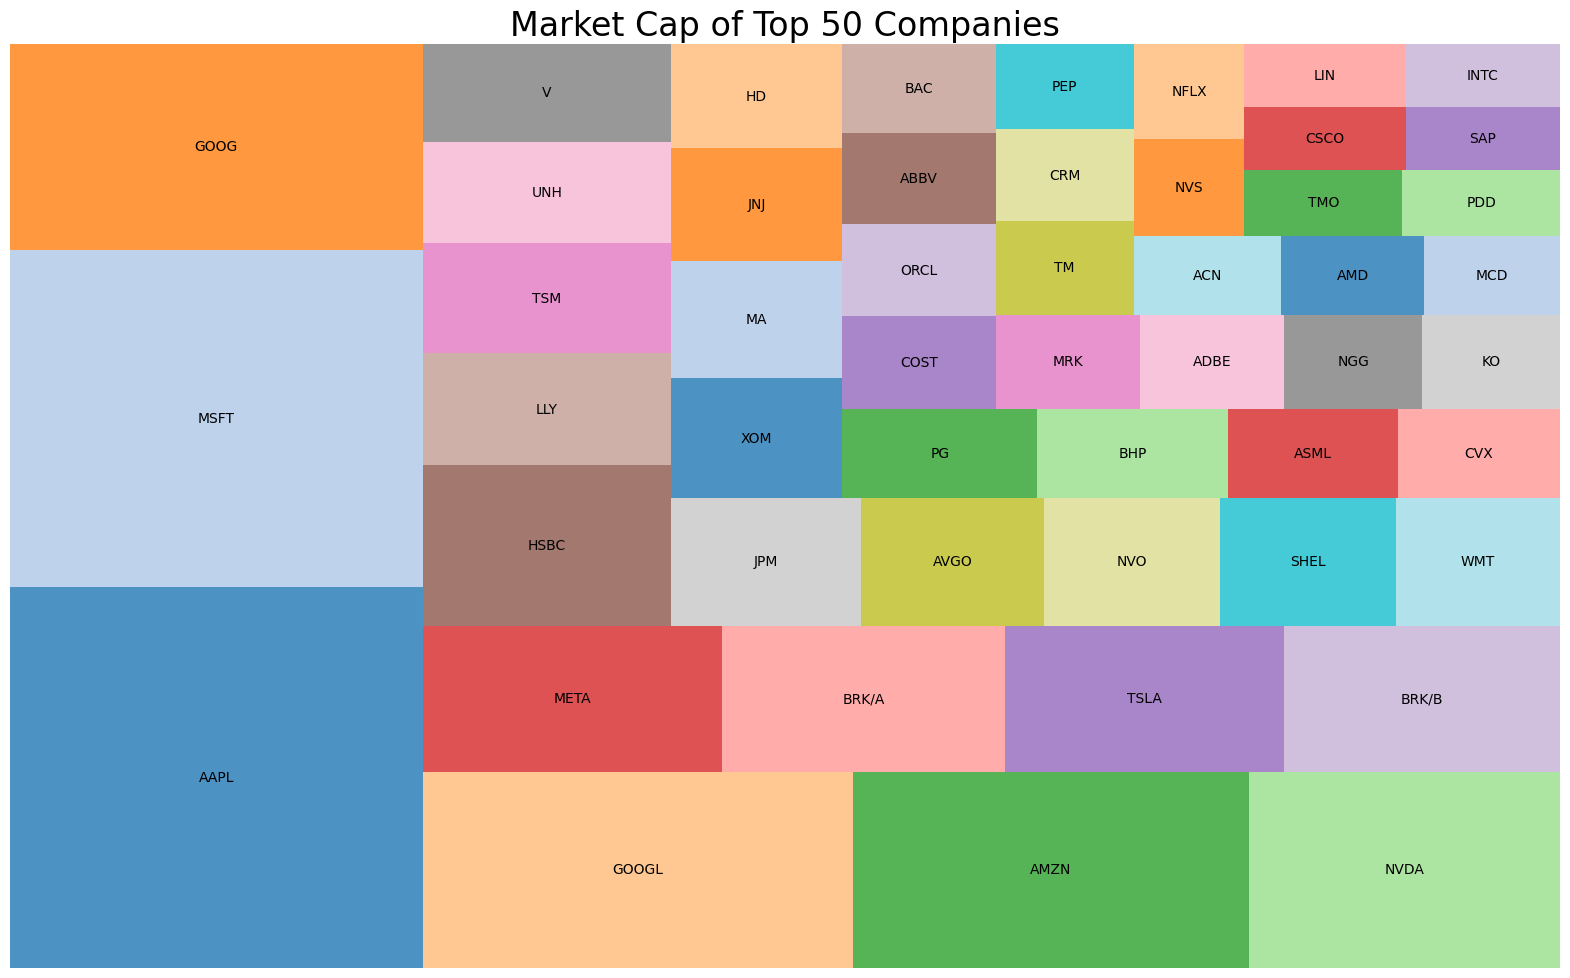

In [58]:
# !pip install squarify
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd



temp_data = df_nasdaq_official[['Symbol', 'Market Cap']]
temp_data = temp_data.sort_values('Market Cap', ascending=False)
temp_data = temp_data[:50]


# plot it
plt.figure(figsize=(20, 12)) 
squarify.plot(sizes=temp_data['Market Cap'], label=temp_data['Symbol'], alpha=.8,color=sns.color_palette("tab20", len( temp_data['Symbol'].value_counts())))
plt.axis('off')
plt.title("Market Cap of Top 50 Companies", fontsize=24) 
plt.show()

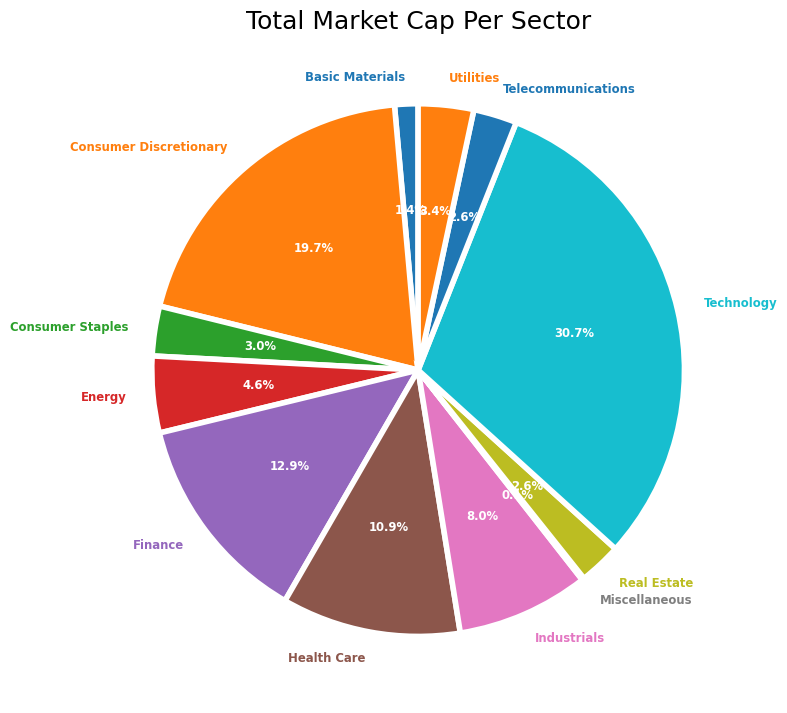

In [88]:

# !pip install squarify
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd



df_total_market_cap_by_sector = df_nasdaq_official[['Sector', 'Market Cap']].groupby('Sector').agg('sum').reset_index()
df_total_market_cap_by_sector.head(40)




# fig, ax = plt.subplots(figsize=(8, 8))

x = df_total_market_cap_by_sector['Market Cap']
labels = df_total_market_cap_by_sector['Sector']





fig, ax = plt.subplots(figsize=(8, 8))

patches, texts, pcts = ax.pie(
    x, labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 4.0, 'edgecolor': 'white'},
    textprops={'size': 'small'},
    startangle=90)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white',fontweight=600)
plt.setp(texts, fontweight=600)
ax.set_title('Total Market Cap Per Sector', fontsize=18)
plt.tight_layout()

In [11]:
len(df_nasdaq_official)

7378

In [12]:
df_nasdaq_official['Market Cap'].isna().sum()

425

In [13]:
df_nasdaq_official['Symbol'].isna().sum()

1

In [14]:
# # df_nasdaq_official = df_nasdaq_official['Market Cap'].dropna()
# # len(df_nasdaq_official)

# df_nasdaq_official.dropna(subset=['Symbol','Market Cap'], inplace=True)
# len(df_nasdaq_official)

In [15]:
# lineplot_company_marketcap = sns.lineplot(data = df_nasdaq_official, x='Symbol', palette = 'viridis', y='Market Cap')
# lineplot_company_marketcap.tick_params(axis='x', rotation=90)

# import matplotlib.pyplot as plt

# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# sizes = [15, 30, 45, 10]

# fig, ax = plt.subplots()
# ax.pie(df_nasdaq_official['Market Cap'], labels=df_nasdaq_official['Symbol'])

In [16]:
df_nasdaq_official['Symbol'].isna().sum()

1